# 4.10. Coding Etiquette & Excel Reporting

### Table of Contents

1. Importing Data

2. Addressing PII Data

3. Comparing Customer Behavior

    3.1. Comparing Customer Behavior in Different Geographic Areas
    
    3.2. Determine the Difference in Spending between the Different U.S. Regions
    
4. Creating an Exclusion Flag & Excluding the Low Activity Customers

    4.1. Creating an Exclusion Flag
    
    4.2. Excluding Low Acticity Customers
    
5. Profiling Customers

    5.1. Customer by Age
    
    5.2. Profiling Customers by Income
    
    5.3. Profiling Customers by Certain Goods in the 'department_id'
    
        5.3.1. Profiling Customer by Alcohol Behavior
        
        5.3.2. Profiling Customer by Pet Ownership
        
    5.4. Profiling Customers by Number of Dependants & Family Status
    
6. Creating Visualization

    6.1. Creating Bar Chart from the 'region' Variable
    
    6.2. Creating Bar Chart from the 'Customer Activity' Variable
    
    6.3. Creating Bar Chart from the 'Age Group' Variable
    
    6.4. Creating Bar Chart from the 'Income Group' Variable
    
    6.5. Creating Bar Chart from the 'Alcohol Behavior' Variable
    
    6.6. Creating Pie Chart from the 'Pet Ownership' Variable
    
    6.7. Creating Pie Chart from the 'Household' Variable
    
    6.8. Creating Bar Chart from the 'Busiest Day of the Week' Variable
    
    6.9. Creating Bar Chart from the 'Order Hour of the Day' Variable
    
    6.10. Creating Bar Chart from the 'Age Group' & 'Household' Variables
    
7. Creating A Customer-Profile Aggregation for Usage Frequency and Expenditure

    7.1. Creating the Region Frequency Aggregation
    
    7.2. Creating the Customer Activity Expenditure Aggregation
    
    7.3. Creating the Age Group Expenditure Aggregation
    
    7.4. Creating the Income Group Expenditure Aggregation
    
    7.5. Creating the Alcohol Behavior Frequency Aggregation
    
    7.6. Creating the Pet Ownership Frequency Aggregation
    
    7.7. Creating the Household Expenditure Aggregation
    
8. Comparing Customer Profiles with Region and Departments

    8.1. Comparing Income Group with Department
    
    8.2. Comparing Age Group with Department
    
    8.3. Comparing Alcohol Behavior with Region
    
    8.4. Comparing Pet Ownership with Region
    
    8.5. Comparing Household with Region
    
    8.6. Comparing the Busiest Period of Day with Department
    
9. Exporting the Final Data Set    


## Importing Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1. Importing Data

In [2]:
#Create Path
path = r'C:\Users\praha\OneDrive\Documents\Python\02-2023 Instachart Basket Analysis'

In [3]:
#import dataframe 'customers_orders_products_merged.pkl'
df = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'customers_orders_products_merged.pkl'))

In [4]:
#import dataframe'departments_wrangled'csv
df_dept = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

## 2. Addressing PII Data

In [5]:
#check df size
df.shape

(30629741, 35)

In [6]:
#check df column's name
df.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_label', 'busiest_day', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'max_prices', 'max_price', 'Spending_flag',
       'average_price', 'regularity_of_users_ordering_behavior',
       'frequency_flag'],
      dtype='object')

Analysis: "first_name" and "surname" columns are the part of PII data. Deleting columns is the one of the best ways to address PII data.

In [7]:
#delete 'first_name' & 'surname' column
df = df.drop(columns = ['first_name', 'surname'])

In [8]:
#check the result
df.shape

(30629741, 33)

In [9]:
df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_label',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'max_prices', 'max_price', 'Spending_flag',
       'average_price', 'regularity_of_users_ordering_behavior',
       'frequency_flag'],
      dtype='object')

Analysis: 'first_name' & 'surname' columns have been deleted

In [10]:
df.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,product_id,product_name,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_prices,max_price,Spending_flag,average_price,regularity_of_users_ordering_behavior,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Average Orders,8,New customer,12.6,7.988889,Low spender,7.988889,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,regularly busy,Most Orders,8,New customer,12.6,7.988889,Low spender,7.988889,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most Orders,8,New customer,12.6,7.988889,Low spender,7.988889,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,regularly busy,Average Orders,8,New customer,12.6,7.988889,Low spender,7.988889,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Slowest days,Most Orders,8,New customer,12.6,7.988889,Low spender,7.988889,19.0,Regular customer


## 3. Comparing Customer Behavior

### 3.1. Comparing Customer Behavior in Different Geographic Areas

In [11]:
#check the frequency of 'state' column
df['state'].value_counts(dropna = False)

California              630308
Pennsylvania            629833
Rhode Island            621341
Georgia                 620618
Arizona                 619810
North Carolina          618268
Oklahoma                615354
Minnesota               613699
New Mexico              611481
Maine                   610309
Alaska                  610279
Wyoming                 609764
Massachusetts           608964
Arkansas                608035
Mississippi             607362
Texas                   605608
North Dakota            605317
Nevada                  605083
Missouri                604383
Virginia                603563
South Dakota            602744
Kansas                  602396
Louisiana               602384
Alabama                 602310
South Carolina          602049
New York                601409
Washington              601352
Montana                 600639
Michigan                600593
Kentucky                600323
Colorado                599764
Oregon                  599340
Delaware

In [12]:
# Create lists to map states to regions
region_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [13]:
# Derive 'region' column with loc[]

df.loc[df['state'].isin(region_NE), 'region'] = 'Northeast'
df.loc[df['state'].isin(region_MW), 'region'] = 'Midwest'
df.loc[df['state'].isin(region_S), 'region'] = 'South'
df.loc[df['state'].isin(region_W), 'region'] = 'West'

In [14]:
#check the frequency of 'region' column
df['region'].value_counts(dropna = False)

South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: region, dtype: int64

In [15]:
#check the output
df.shape

(30629741, 34)

## 3.2. Determine the Difference in Spending between the Different U.S. Regions

In [16]:
#Create a crosstab between 'region' and Spending_flag'
df_crosstab = pd.crosstab(df['region'], df['Spending_flag'], dropna = False)

In [17]:
df_crosstab

Spending_flag,High spender,Low spender
region,,
Midwest,149817,7027107
Northeast,101420,5320605
South,196523,10002459
West,147803,7684007


In [18]:
#Create a crosstab between 'region' and 'Spending_flag' by Percentage
df_crosstab_pct = pd.crosstab(df['region'], df['Spending_flag'], normalize='index') * 100

In [19]:
df_crosstab_pct

Spending_flag,High spender,Low spender
region,,
Midwest,2.087482,97.912518
Northeast,1.870519,98.129481
South,1.926888,98.073112
West,1.887214,98.112786


Analysis: The south region is the highest region with high spender based on the number of customer, whereas the midwest region is the highest region with high spender based on percentage of customer.

## 4. Creating an Exclusion Flag & Excluding the low activity customers

### 4.1. Creating an Exclusion Flag

In [20]:
#check the frequency of 'state' column
df['order_number'].value_counts(dropna = False)

1     1962703
3     1936828
2     1934448
4     1719662
5     1539425
       ...   
95      13700
96      12995
97      12522
98      12078
99      11708
Name: order_number, Length: 99, dtype: int64

In [21]:
#check dataframe size
df.shape

(30629741, 34)

In [22]:
#derive 'exclusion_flag' column with loc() 
df.loc[df['order_number'] < 5, 'exclusion_flag'] = 'low_activity_customer'

In [23]:
df.loc[df['order_number'] >= 5, 'exclusion_flag'] = 'high_activity_customer'

In [24]:
#check the result
df.shape

(30629741, 35)

In [25]:
#check the frequency of 'exclusion_flag' column
df['exclusion_flag'].value_counts(dropna = False)

high_activity_customer    23076100
low_activity_customer      7553641
Name: exclusion_flag, dtype: int64

### 4.2. Excluding Low Activity Customers

In [26]:
# Create a subset which excludes low_activity customers
df_high_activity = df[df['exclusion_flag'] == 'high_activity_customer']

In [27]:
#check the frequency of 'exclusion_flag' column
df_high_activity['exclusion_flag'].value_counts(dropna = False)

high_activity_customer    23076100
Name: exclusion_flag, dtype: int64

In [28]:
#check the result
df_high_activity.shape

(23076100, 35)

In [29]:
#Export the subset
#df_high_activity.to_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'Data_merged_high_activity.pkl'))

## 5. Profiling Customers

### 5.1. Profiling Customers by Age

In [30]:
#assign high activity customers as observed customers
df_customers = df_high_activity

In [31]:
#check dataframe size
df_customers.shape

(23076100, 35)

In [32]:
#check descriptive statistics for 'Age' column
df_customers['age'].describe()

count    2.307610e+07
mean     4.946644e+01
std      1.847818e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

The age range of customers is between 18 and 81. Therefore, the age of customers can be grouped into:

Young Adults = 18 - 39; 

Middle-Aged Adults = 40 - 59; and

Old Adults >= 60

In [33]:
#derive 'age_group' column with loc()
df_customers.loc[df_customers['age'] <= 39, 'age_group'] = 'Young Adults'

C:\Users\praha\AppData\Local\Temp\ipykernel_5464\1251691085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.loc[df_customers['age'] <= 39, 'age_group'] = 'Young Adults'


In [34]:
df_customers.loc[(df_customers['age'] >= 40) & (df_customers['age'] <= 59), 'age_group'] = 'Middle-Aged Adults'

In [35]:
df_customers.loc[df_customers['age'] >= 60, 'age_group'] = 'Old Adults'

In [36]:
#check the frequency of the 'age_group' column
df_customers['age_group'].value_counts(dropna = False)

Young Adults          7952082
Old Adults            7876519
Middle-Aged Adults    7247499
Name: age_group, dtype: int64

In [37]:
#check output size
df_customers.shape

(23076100, 36)

In [38]:
df_customers.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_label',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'max_prices', 'max_price', 'Spending_flag',
       'average_price', 'regularity_of_users_ordering_behavior',
       'frequency_flag', 'region', 'exclusion_flag', 'age_group'],
      dtype='object')

### 5.2. Profilling Customers by Income

In [39]:
#check descriptive statistics for 'income' column
df_customers['income'].describe()

count    2.307610e+07
mean     9.991669e+04
std      4.333860e+04
min      2.590300e+04
25%      6.757900e+04
50%      9.682600e+04
75%      1.282150e+05
max      5.939010e+05
Name: income, dtype: float64

The income range of customers is between 25.903 and 593.901. Therefore, according to Few Study, the customer income range can be grouped into: 

Low Income : < 52.200; 

Middle Income : 52.200 - 156.000; and 

Upper Income : >= 156.000

In [40]:
#derive 'income_group' column with loc()
df_customers.loc[df_customers['income'] < 52200, 'income_group'] = 'Low Income'

C:\Users\praha\AppData\Local\Temp\ipykernel_5464\1290197034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.loc[df_customers['income'] < 52200, 'income_group'] = 'Low Income'


In [41]:
df_customers.loc[(df_customers['income'] >= 52200) & (df_customers['income'] < 156000), 'income_group'] = 'Middle Income'

In [42]:
df_customers.loc[df_customers['income'] >= 156000, 'income_group'] = 'High Income'

In [43]:
#check the frequency of the 'income_group' column
df_customers['income_group'].value_counts(dropna = False)

Middle Income    18270884
Low Income        2682328
High Income       2122888
Name: income_group, dtype: int64

In [44]:
#check output size
df_customers.shape

(23076100, 37)

### 5.3. Profilling Customers by Certain goods in the 'department_id'

In [45]:
#call 'df_dept' column
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [46]:
# Assign index column as 'department_id'

df_dept.rename(columns= {"Unnamed: 0": "department_id"}, inplace=True)

In [47]:
# create a dictionary using zip and a dictionary comprehension
dept_dict = {k: v for k, v in zip(df_dept['department_id'], df_dept['department'])}

In [48]:
dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [49]:
# derive 'department' column into 'df_customers' dataframe using map() function

df_customers['department'] = df_customers['department_id'].map(dept_dict)

C:\Users\praha\AppData\Local\Temp\ipykernel_5464\2167874648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['department'] = df_customers['department_id'].map(dept_dict)


In [50]:
#check the frequency of 'department' column
df_customers['department'].value_counts(dropna = False)

produce            6834944
dairy eggs         3892801
snacks             2067470
beverages          1924512
frozen             1538641
pantry             1307873
bakery              835178
canned goods        744749
deli                740043
dry goods pasta     599624
household           508510
meat seafood        496155
breakfast           494849
babies              317126
personal care       309279
international       187201
alcohol             103071
pets                 68151
missing              54473
bulk                 26004
other                25446
Name: department, dtype: int64

In [51]:
#check dataframe size
df_customers.shape

(23076100, 38)

In [52]:
df_customers.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_label',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'max_prices', 'max_price', 'Spending_flag',
       'average_price', 'regularity_of_users_ordering_behavior',
       'frequency_flag', 'region', 'exclusion_flag', 'age_group',
       'income_group', 'department'],
      dtype='object')

#### 5.3.1. Profilling Customer by Alcohol Behavior

In [53]:
#derive 'alcohol_behavior' column using loc() function
df_customers.loc[df_customers['department'] == 'alcohol', 'alcohol_behavior'] = 'alcoholic customers'
df_customers.loc[df_customers['department'] != 'alcohol', 'alcohol_behavior'] = 'non-alcoholic customers'

C:\Users\praha\AppData\Local\Temp\ipykernel_5464\2613900474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.loc[df_customers['department'] == 'alcohol', 'alcohol_behavior'] = 'alcoholic customers'


In [54]:
df_customers['alcohol_behavior'].value_counts(dropna=False)

non-alcoholic customers    22973029
alcoholic customers          103071
Name: alcohol_behavior, dtype: int64

In [55]:
#check dataframe size
df_customers.shape

(23076100, 39)

#### 5.3.2. Profilling Customer by Pet Ownership

In [56]:
#derive 'pet_ownership' column using loc() function
df_customers.loc[df_customers['department'] == 'pets', 'pet_ownership'] = 'pet owner'
df_customers.loc[df_customers['department'] != 'pets', 'pet_ownership'] = 'non-pet owner'

C:\Users\praha\AppData\Local\Temp\ipykernel_5464\2152833140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.loc[df_customers['department'] == 'pets', 'pet_ownership'] = 'pet owner'


In [57]:
df_customers['pet_ownership'].value_counts(dropna=False)

non-pet owner    23007949
pet owner           68151
Name: pet_ownership, dtype: int64

In [58]:
#check dataframe size
df_customers.shape

(23076100, 40)

### 5.4. Profilling Customers by Number of Dependants & Family Status

In [59]:
#check the frequency of 'n_dependats' column
df_customers['n_dependants'].value_counts(dropna=False)

3    5789340
2    5768245
0    5766770
1    5751745
Name: n_dependants, dtype: int64

In [60]:
#explore data with making crosstab between 'n_dependants' & 'fam_status' columns
df_cross_deps_fam = pd.crosstab(df_customers['n_dependants'],df_customers['fam_status'],dropna = False)

In [61]:
df_cross_deps_fam

fam_status,divorced/widowed,living with parents and siblings,married,single
n_dependants,,,,
0,1984561,0,0,3782209
1,0,387917,5363828,0
2,0,359959,5408286,0
3,0,363769,5425571,0


According to the ILO (International Labour Organization), The types of households are classified as follows:
- One person: These households have only one member who is listed as the “household head” under the household relationship variable.
- Couple without children: These households have two members. One member is listed as the “household head” and the other is listed as the “spouse of head”, or other indicator of union with the head, under the household relationship variable.
- Couple with children: These households have three or more members. One member is listed as the “household head”, one member is listed as the “spouse of head” and at least one member is listed as a “child of head”. In these households, a child is only defined by their relationship to the head of household (i.e. being a child here is regardless of age). There can also be multiple children. These households necessarily have a household head, their spouse (or partner) and children.
- Lone parent: These households have two or more members. One member is listed as the “household head” and at least one member is listed as a “child of head”. In these households a child is only defined by their relationship to the head of household (i.e. being a child here is regardless of age). There can also be multiple children. These households always only have a head of household and the children of the head.
- Extended family: These households have two or more members. One member is listed as the “household head” and at least one member is listed as a relative of the household head other than “spouse of head” or “child of head”. These households may contain heads, spouses, children of the head, and any other familial relative. However, they must not include any extra-familial members.

In [62]:
#derive new variable namely 'household' using loc() function
df_customers.loc[(df_customers['fam_status'] == 'divorced/widowed')|(df_customers['fam_status'] == 'single'), 'household'] = 'One Person'

C:\Users\praha\AppData\Local\Temp\ipykernel_5464\1075960763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.loc[(df_customers['fam_status'] == 'divorced/widowed')|(df_customers['fam_status'] == 'single'), 'household'] = 'One Person'


In [63]:
df_customers.loc[(df_customers['fam_status'] == 'married') & (df_customers['n_dependants'] == 1), 'household'] = 'Couple without Children'

In [64]:
df_customers.loc[(df_customers['fam_status'] == 'married') & (df_customers['n_dependants'] > 1), 'household'] = 'Couple with children'

In [65]:
df_customers.loc[(df_customers['fam_status'] == 'living with parents and siblings'), 'household'] = 'Extended Family'

In [66]:
# check the frequency of 'household' column
df_customers['household'].value_counts(dropna=False)

Couple with children       10833857
One Person                  5766770
Couple without Children     5363828
Extended Family             1111645
Name: household, dtype: int64

In [67]:
#check the size of dataframe
df_customers.shape

(23076100, 41)

In [68]:
df_customers.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_label',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'max_prices', 'max_price', 'Spending_flag',
       'average_price', 'regularity_of_users_ordering_behavior',
       'frequency_flag', 'region', 'exclusion_flag', 'age_group',
       'income_group', 'department', 'alcohol_behavior', 'pet_ownership',
       'household'],
      dtype='object')

## 6. Creating Visualization

### 6.1. Creating Bar Charts from the 'region' variable

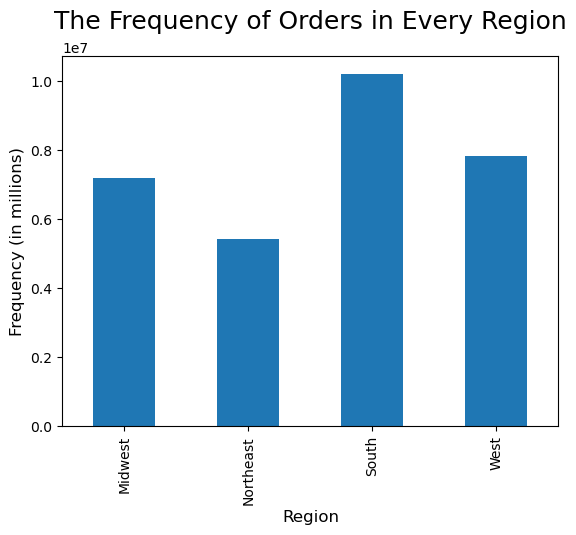

In [165]:
#create bar charts from 'region' column
bar_region = df['region'].value_counts().sort_index().plot.bar()
plt.title('The Frequency of Orders in Every Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

#save the bar chart from the region variable
bar_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_region.png'))

### 6.2. Creating Bar Charts from the 'Customer Activity' Variable

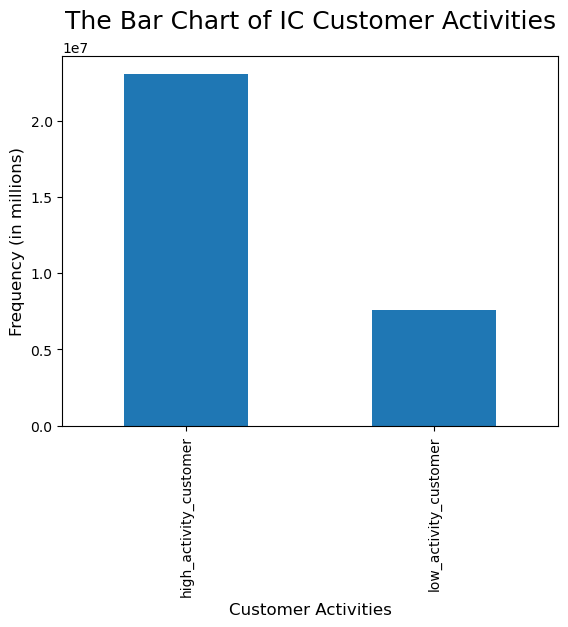

In [166]:
#create bar charts from 'exclusion_flag' column
bar_activity = df['exclusion_flag'].value_counts().sort_index().plot.bar()
plt.title('The Bar Chart of IC Customer Activities', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Customer Activities',  fontsize = 12)

#save the bar chart from the customer activity variable
bar_activity.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_activity.png'))

### 6.3. Creating Bar Charts from the 'age group' variable

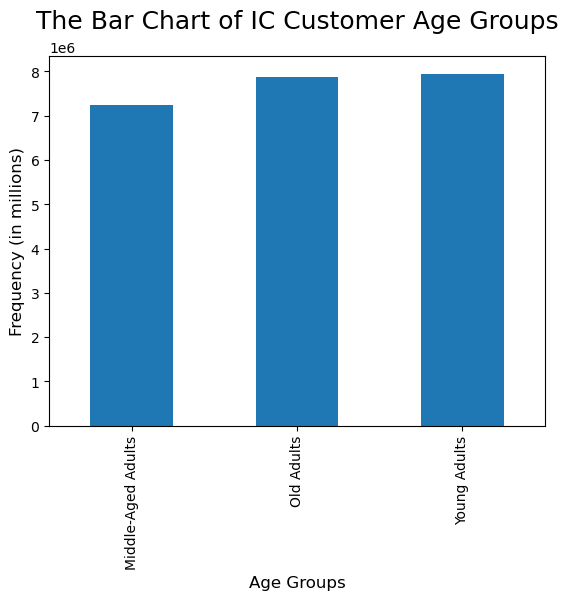

In [167]:
#create bar charts from 'age_group' column
bar_age_group = df_customers['age_group'].value_counts().sort_index().plot.bar()
plt.title('The Bar Chart of IC Customer Age Groups', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Groups',  fontsize = 12)

#save the bar chart from the age group variable
bar_age_group.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_age_group.png'))

### 6.4. Creating Bar Charts from the 'income group' variable

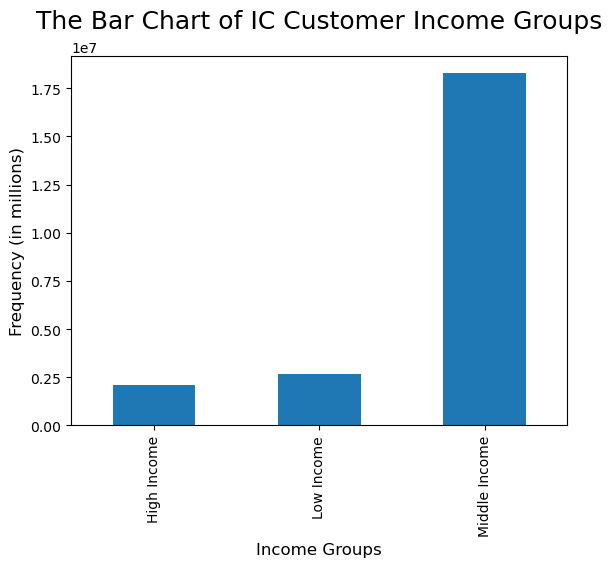

In [168]:
#create bar charts from 'income_group' column
bar_income_group = df_customers['income_group'].value_counts().sort_index().plot.bar()
plt.title('The Bar Chart of IC Customer Income Groups', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Income Groups',  fontsize = 12)

#save the bar chart from the income group variable
bar_income_group.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_income_group.png'))

### 6.5. Creating Pie Chart from 'Alcohol Behavior' Variable

In [73]:
df_customers['alcohol_behavior'].value_counts(dropna=False)

non-alcoholic customers    22973029
alcoholic customers          103071
Name: alcohol_behavior, dtype: int64

In [74]:
# count values of each category
alcohol_counts = df_customers['alcohol_behavior'].value_counts(dropna=False)

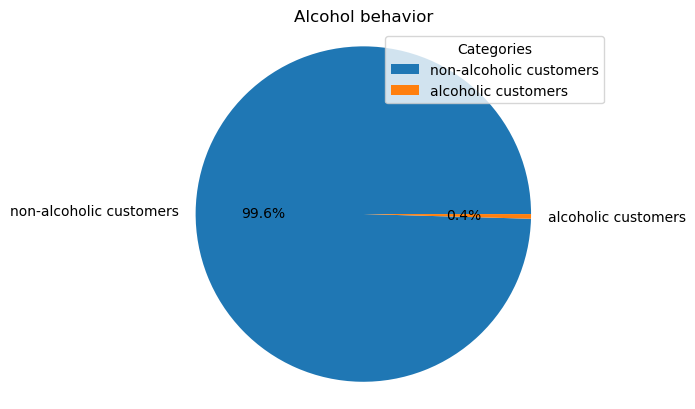

In [148]:
# create pie chart
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Alcohol behavior')
plt.legend(title='Categories')

# save the pie chart as an image
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pie_alcohol_behavior.png'))

### 6.6. Creating Pie Chart from 'Pet Ownership' Variable

In [76]:
# count values of each category
counts_pets = df_customers['pet_ownership'].value_counts(dropna=False)

In [77]:
# set colors for each category
colors = ['#ff9999', '#66b3ff']

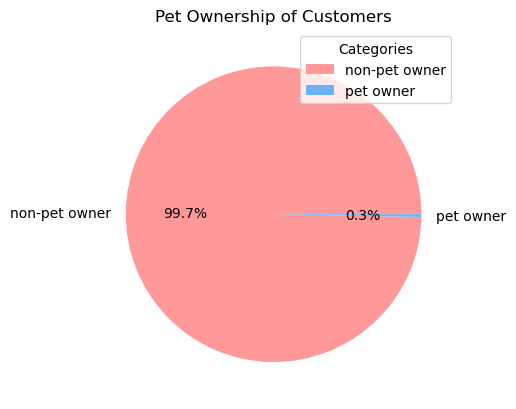

In [149]:
# create pie chart
plt.pie(counts_pets.values, labels=counts_pets.index, colors=colors, autopct='%1.1f%%')
plt.title('Pet Ownership of Customers')
plt.legend(title='Categories')

# save the pie chart as an image
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pie_pet_ownership.png'))

### 6.7. Creating Pie Chart from 'Household' Variable

In [79]:
# count values of each category
household_counts = df_customers['household'].value_counts(dropna=False)

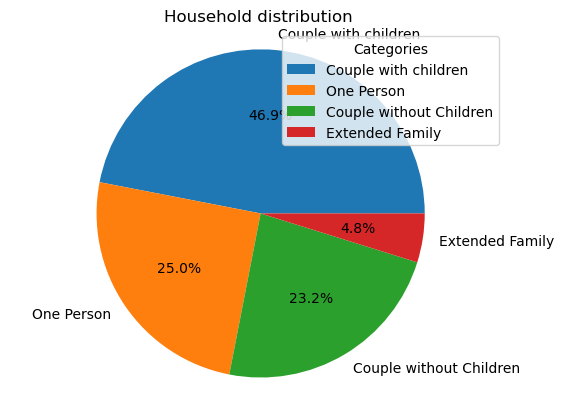

In [150]:
# create pie chart
plt.pie(household_counts, labels=household_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Household distribution')
plt.legend(title='Categories')

# save the pie chart as an image
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pie_household_distribution.png'))

### 6.8. Creating Bar Chart from 'the busiest day of the week' Variable

In [81]:
#check the frequency of the variable
df_customers['orders_day_of_week'].value_counts(dropna = False)

0    4350589
1    4043994
6    3163643
5    3040130
2    3001398
3    2745375
4    2730971
Name: orders_day_of_week, dtype: int64

In [82]:
#make a dictionary
day_dict = {0: 'Saturday',
           1: 'Sunday',
           2: 'Monday',
           3: 'Tuesday',
           4: 'Wednesday', 
           5: 'Thursday',
           6: 'Friday'}

In [83]:
day_dict

{0: 'Saturday',
 1: 'Sunday',
 2: 'Monday',
 3: 'Tuesday',
 4: 'Wednesday',
 5: 'Thursday',
 6: 'Friday'}

In [84]:
# derive 'orders_week' column into 'df_customers' dataframe using map() function
df_customers['orders_week'] = df_customers['orders_day_of_week'].map(day_dict)

C:\Users\praha\AppData\Local\Temp\ipykernel_5464\3893955840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['orders_week'] = df_customers['orders_day_of_week'].map(day_dict)


In [85]:
df_customers['orders_week'].value_counts(dropna = False)

Saturday     4350589
Sunday       4043994
Friday       3163643
Thursday     3040130
Monday       3001398
Tuesday      2745375
Wednesday    2730971
Name: orders_week, dtype: int64

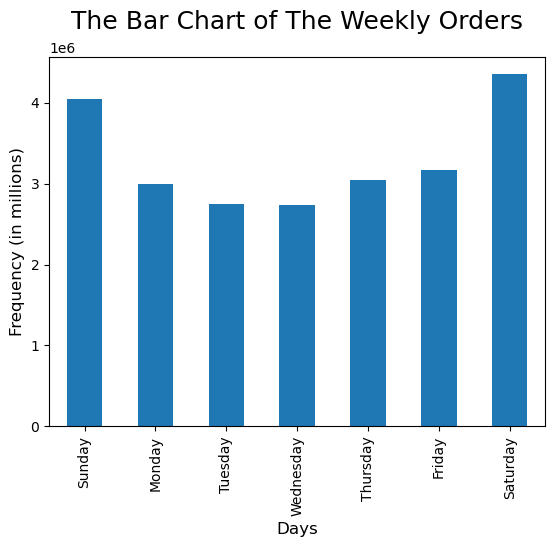

In [151]:
# Define the desired order of days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create a bar chart of the 'orders_week' column, ordered by the desired day order
bar_day_week = df_customers['orders_week'].value_counts().reindex(day_order).plot.bar()

# Set the chart title and axis labels
plt.title('The Bar Chart of The Weekly Orders', fontsize=18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize=12)
plt.xlabel('Days', fontsize=12)

# Save the bar chart as an image
bar_day_week.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_day_week.png'))

### 6.9. Creating Bar Chart from 'order_hour_of_day' Variable

In [87]:
#check the frequency of the variable
df_customers['order_hour_of_day'].value_counts(dropna = False)

10    2002195
11    1958812
14    1908563
13    1889503
15    1880525
12    1852994
9     1804761
16    1779397
17    1450761
8     1274991
18    1125096
19     868890
20     684418
7      665077
21     568641
22     450304
23     282419
6      215544
0      151706
1       78642
5       64362
2       46895
4       36778
3       34826
Name: order_hour_of_day, dtype: int64

In [88]:
#make a dictionary
hour_dict = {0: '12 a.m.',
           1: '1 a.m.',
           2: '2 a.m.',
           3: '3 a.m.',
           4: '4 a.m.', 
           5: '5 a.m.',
           6: '6 a.m.',
           7: '7 a.m.',
           8: '8 a.m.',
           9: '9 a.m.',
           10: '10 a.m.',
           11: '11 a.m.',
           12: '12 p.m.',
           13: '1 p.m.',
           14: '2 p.m.',
           15: '3 p.m.',
           16: '4 p.m.',
           17: '5 p.m.',
           18: '6 p.m.',
           19: '7 p.m.',
           20: '8 p.m.',
           21: '9 p.m.',
           22: '10 p.m.',
           23: '11 p.m.'}

In [89]:
hour_dict

{0: '12 a.m.',
 1: '1 a.m.',
 2: '2 a.m.',
 3: '3 a.m.',
 4: '4 a.m.',
 5: '5 a.m.',
 6: '6 a.m.',
 7: '7 a.m.',
 8: '8 a.m.',
 9: '9 a.m.',
 10: '10 a.m.',
 11: '11 a.m.',
 12: '12 p.m.',
 13: '1 p.m.',
 14: '2 p.m.',
 15: '3 p.m.',
 16: '4 p.m.',
 17: '5 p.m.',
 18: '6 p.m.',
 19: '7 p.m.',
 20: '8 p.m.',
 21: '9 p.m.',
 22: '10 p.m.',
 23: '11 p.m.'}

In [137]:
# derive 'orders_day' column into 'df_customers' dataframe using map() function
df_customers['orders_day'] = df_customers['order_hour_of_day'].map(hour_dict)

C:\Users\praha\AppData\Local\Temp\ipykernel_5464\3539635357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['orders_day'] = df_customers['order_hour_of_day'].map(hour_dict)


In [138]:
df_customers['orders_day'].value_counts(dropna = False)

10 a.m.    2002195
11 a.m.    1958812
2 p.m.     1908563
1 p.m.     1889503
3 p.m.     1880525
12 p.m.    1852994
9 a.m.     1804761
4 p.m.     1779397
5 p.m.     1450761
8 a.m.     1274991
6 p.m.     1125096
7 p.m.      868890
8 p.m.      684418
7 a.m.      665077
9 p.m.      568641
10 p.m.     450304
11 p.m.     282419
6 a.m.      215544
12 a.m.     151706
1 a.m.       78642
5 a.m.       64362
2 a.m.       46895
4 a.m.       36778
3 a.m.       34826
Name: orders_day, dtype: int64

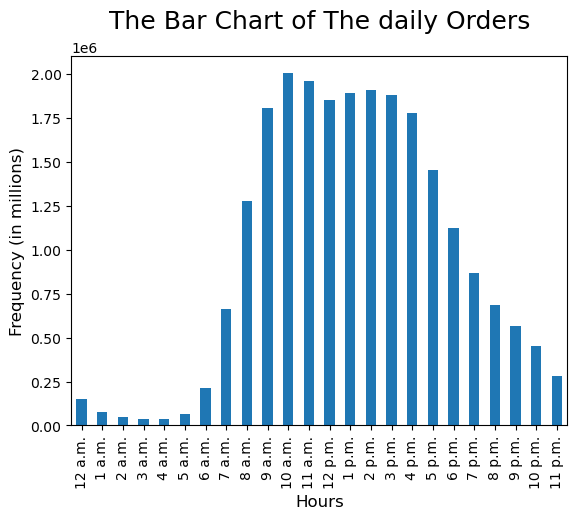

In [153]:
# Define the desired order of days
hour_order = ['12 a.m.','1 a.m.','2 a.m.','3 a.m.','4 a.m.', '5 a.m.','6 a.m.','7 a.m.','8 a.m.','9 a.m.', '10 a.m.','11 a.m.','12 p.m.','1 p.m.',  '2 p.m.', '3 p.m.',  '4 p.m.', '5 p.m.', '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.',  '10 p.m.', '11 p.m.']

# Create a bar chart of the 'orders_day' column, ordered by the desired day order
bar_hour_day = df_customers['orders_day'].value_counts().reindex(hour_order).plot.bar()

# Set the chart title and axis labels
plt.title('The Bar Chart of The daily Orders', fontsize=18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize=12)
plt.xlabel('Hours', fontsize=12)

# Save the chart as an image
bar_hour_day.get_figure().savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_hour_day.png'))

# Show the chart
plt.show()


### 6.10. Creating Bar Chart from The 'Age Group & Household' Variables

In [93]:
#create crosstab from 'age_group' & 'household' columns
cross_age_hhd = pd.crosstab(df_customers['age_group'], df_customers['household'], dropna = False)

In [94]:
cross_age_hhd

household,Couple with children,Couple without Children,Extended Family,One Person
age_group,,,,
Middle-Aged Adults,3583825,1846657,0,1817017
Old Adults,3977201,1914757,0,1984561
Young Adults,3272831,1602414,1111645,1965192


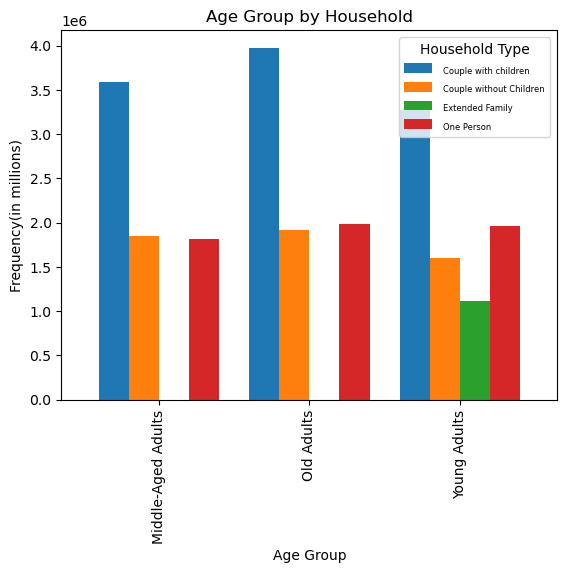

In [154]:
# plot clustered bar chart
ax = cross_age_hhd.plot(kind='bar', width=0.8)

# set chart title and axis labels
ax.set_title('Age Group by Household')
ax.set_xlabel('Age Group')
ax.set_ylabel('Frequency(in millions)')

# add legend
legend = ax.legend(title='Household Type')
for text in legend.get_texts():
    text.set_fontsize(6)

# save the chart as an image
fig = ax.get_figure()
fig.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_group_by_household.png'))

# show chart
plt.show()

## 7. Creating A Customer-profile Aggregation for Usage Frequency and Expenditure

### 7.1. Creating the Region Frequency Aggregation

### 7.2. Creating the Customer Activity Expenditure Aggregation

In [96]:
#create the Customer Activity expenditure aggregation
df.groupby('exclusion_flag').agg({'prices' : ['max', 'mean', 'min']})

prices                
                            max       mean  min
exclusion_flag                                 
high_activity_customer  99999.0  11.756827  1.0
low_activity_customer   99999.0  12.405465  1.0

### 7.3. Creating the Age Group Expenditure Aggregation

In [97]:
#create the Age Group expenditure aggregation
df_customers.groupby('age_group').agg({'prices' : ['max', 'mean', 'min']})

prices                
                        max       mean  min
age_group                                  
Middle-Aged Adults  99999.0  11.943264  1.0
Old Adults          99999.0  11.452336  1.0
Young Adults        99999.0  11.888508  1.0

### 7.4. Creating the Income Group Expenditure Aggregation

In [98]:
#create the Age Group expenditure aggregation
df_customers.groupby('income_group').agg({'prices' : ['max', 'mean', 'min']})

prices                
                   max       mean  min
income_group                          
High Income    99999.0  37.100123  1.0
Low Income        25.0   6.777445  1.0
Middle Income  99999.0   9.543216  1.0

### 7.5. Creating the Alcohol Behavior Frequency Aggregation

In [99]:
#create the Alcohol Behavior frequency aggregation
df_customers.groupby('alcohol_behavior').agg({'order_number' : ['max', 'mean', 'min']})

order_number               
                                 max       mean min
alcohol_behavior                                   
alcoholic customers               99  20.635300   5
non-alcoholic customers           99  21.932321   5

### 7.6. Creating the Pet Ownership Frequency Aggregation

In [100]:
#create the pet ownership frequency aggregation
df_customers.groupby('pet_ownership').agg({'order_number' : ['max', 'mean', 'min']})

order_number               
                       max       mean min
pet_ownership                            
non-pet owner           99  21.932158   5
pet owner               99  20.025766   5

### 7.7. Creating the Household Expenditure Aggregation

In [101]:
#create the household expenditure aggregation
df_customers.groupby('household').agg({'prices' : ['max', 'mean', 'min']})

prices                
                             max       mean  min
household                                       
Couple with children     99999.0  11.819304  1.0
Couple without Children  99999.0  11.540975  1.0
Extended Family          99999.0  10.821449  1.0
One Person               99999.0  12.020536  1.0

## 8. Comparing Customer Profiles with Region and Departments

### 8.1. Comparing Income Group with Department

In [102]:
#create crosstab from 'region' & 'income_group' columns
cross_dept_inc = pd.crosstab(df_customers['department'], df_customers['income_group'], dropna = False)

In [103]:
cross_dept_inc

income_group,High Income,Low Income,Middle Income
department,,,
alcohol,13921,12630,76520
babies,29795,24732,262599
bakery,82852,85136,667190
beverages,173964,305365,1445183
breakfast,44874,72267,377708
bulk,1832,3967,20205
canned goods,71809,62498,610442
dairy eggs,362724,407008,3123069
deli,68139,83902,588002


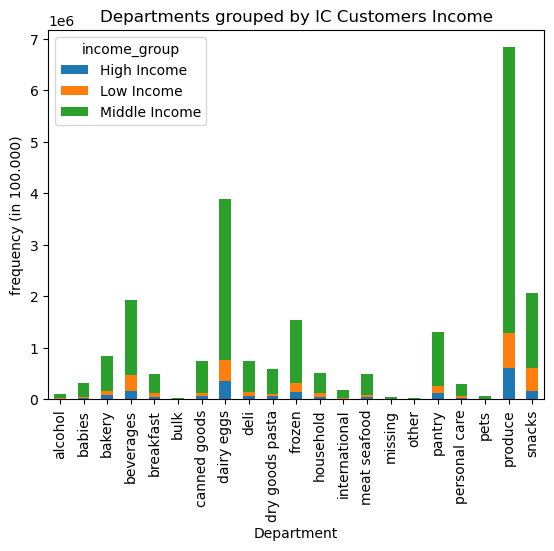

In [157]:
# plot stacked bar chart
cross_dept_inc.plot(kind='bar', stacked=True)

# set chart title and axis labels
plt.title('Departments grouped by IC Customers Income')
plt.xlabel('Department')
plt.ylabel('frequency (in 100.000)')

#save image
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'stacked_dept_income.png'))

# show chart
plt.show()

### 8.2. Comparing Age Group with Department

In [105]:
#create crosstab from 'department' & 'age_group' columns
cross_dept_age = pd.crosstab(df_customers['department'], df_customers['age_group'], dropna = False)

In [106]:
cross_dept_age

age_group,Middle-Aged Adults,Old Adults,Young Adults
department,,,
alcohol,32365,33271,37435
babies,101297,107108,108721
bakery,262755,284699,287724
beverages,607544,662641,654327
breakfast,154967,168148,171734
bulk,8022,8921,9061
canned goods,235049,252222,257478
dairy eggs,1219607,1324892,1348302
deli,231507,253325,255211


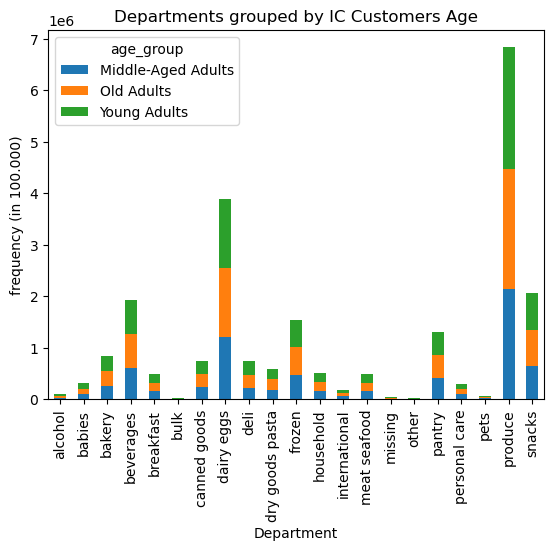

In [158]:
# plot stacked bar chart
cross_dept_age.plot(kind='bar', stacked=True)

# set chart title and axis labels
plt.title('Departments grouped by IC Customers Age')
plt.xlabel('Department')
plt.ylabel('frequency (in 100.000)')

#save image
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'stacked_dept_age.png'))
# show chart
plt.show()

### 8.3. Comparing Alcohol Behavior with Region

In [108]:
#create crosstab from 'region' & 'alcohol_behavior' columns
cross_reg_alc = pd.crosstab(df_customers['region'], df_customers['alcohol_behavior'], dropna = False)

In [109]:
cross_reg_alc

alcohol_behavior,alcoholic customers,non-alcoholic customers
region,,
Midwest,24716,5370371
Northeast,17662,4071889
South,34393,7647978
West,26300,5882791


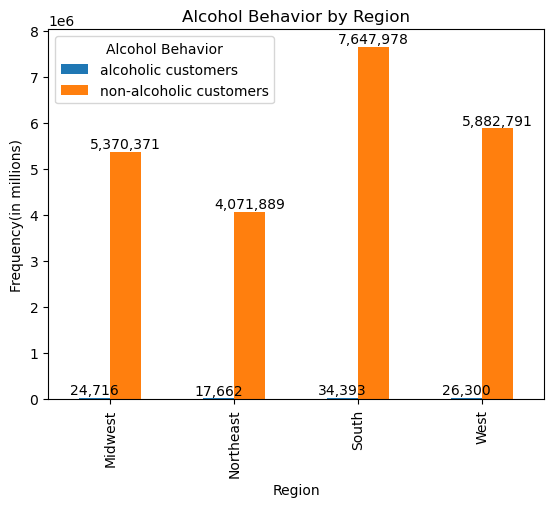

In [159]:
# plot stacked bar chart
ax = cross_reg_alc.plot(kind='bar')

# add data labels
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_y() + rect.get_height() + 10000
    label = f"{int(rect.get_height()):,}"
    ax.annotate(label, (x, y), ha='center', va='bottom')

# set chart title and axis labels
ax.set_title('Alcohol Behavior by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Frequency(in millions)')

# add legend
ax.legend(title='Alcohol Behavior')

#save image
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_reg_alc.png'))

# show chart
plt.show()

### 8.4. Comparing Pet Ownership with Region

In [111]:
#create crosstab from 'region' & 'pet_ownership' columns
cross_reg_pet = pd.crosstab(df_customers['region'], df_customers['pet_ownership'], dropna = False)

In [112]:
cross_reg_pet

pet_ownership,non-pet owner,pet owner
region,,
Midwest,5379449,15638
Northeast,4076346,13205
South,7660594,21777
West,5891560,17531


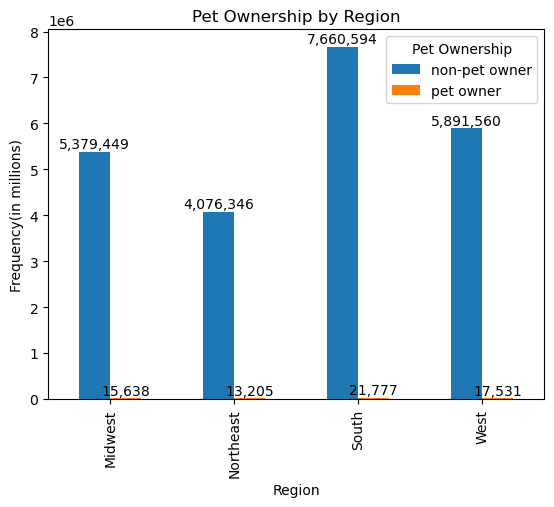

In [160]:
# plot stacked bar chart
ax = cross_reg_pet.plot(kind='bar')

# add data labels
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_y() + rect.get_height() + 10000
    label = f"{int(rect.get_height()):,}"
    ax.annotate(label, (x, y), ha='center', va='bottom')

# set chart title and axis labels
ax.set_title('Pet Ownership by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Frequency(in millions)')

# add legend
ax.legend(title='Pet Ownership')

#save image
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_reg_pet.png'))

# show chart
plt.show()

### 8.5. Comparing Household with Region

In [114]:
#create crosstab from 'region' & 'household' columns
cross_reg_hhd = pd.crosstab(df_customers['region'], df_customers['household'], dropna = False)

In [115]:
cross_reg_hhd

household,Couple with children,Couple without Children,Extended Family,One Person
region,,,,
Midwest,2485986,1288412,258814,1361875
Northeast,1925601,962204,194849,1006897
South,3631258,1751729,380688,1918696
West,2791012,1361483,277294,1479302


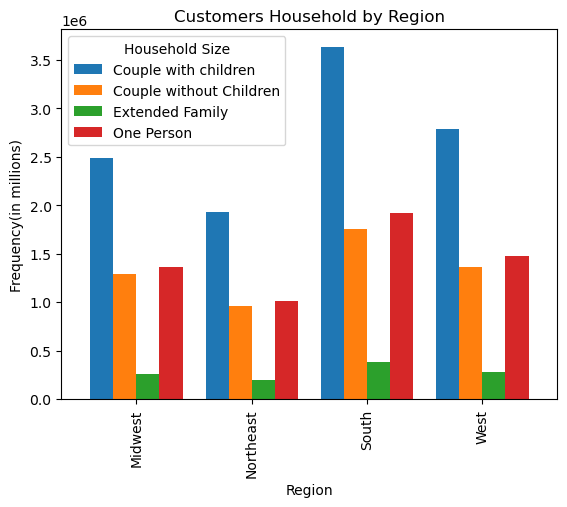

In [161]:
# plot clustered bar chart
ax = cross_reg_hhd.plot(kind='bar', width=0.8)

# set chart title and axis labels
ax.set_title('Customers Household by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Frequency(in millions)')

# add legend
ax.legend(title='Household Size')

#save image
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_reg_hhd.png'))

# show chart
plt.show()

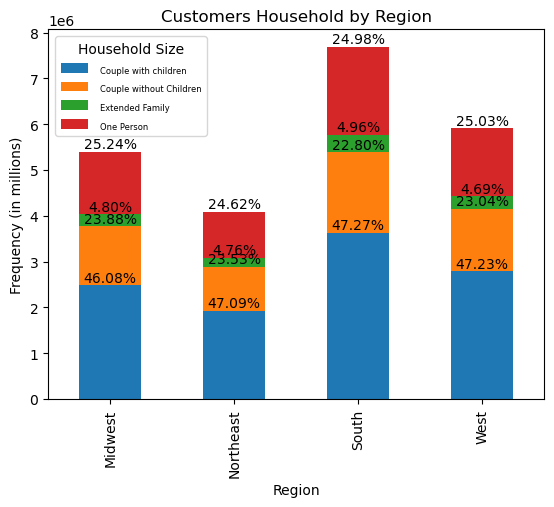

In [162]:
# calculate total values for each row in cross_reg_hhd
total = cross_reg_hhd.sum(axis=1)

# plot stacked bar chart
ax = cross_reg_hhd.plot(kind='bar', stacked=True)

# add data labels
for rect in ax.patches:
    x = round(rect.get_x() + rect.get_width() / 2)
    y = rect.get_y() + rect.get_height() + 10000
    label = f"{rect.get_height()/total[x]:.2%}" # calculate proportion and format as percentage
    ax.annotate(label, (x, y), ha='center', va='bottom')

# set chart title and axis labels
ax.set_title('Customers Household by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Frequency (in millions)')

# add legend
legend = ax.legend(title='Household Size')
for text in legend.get_texts():
    text.set_fontsize(6)

#save image
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'stacked_reg_hhd.png'))

# show chart
plt.show()

### 8.6. Comparing the Busiest Period of day with Department

In [118]:
#create crosstab from 'department' & 'busiest_period_of_day' columns
cross_dept_bpday = pd.crosstab(df_customers['department'], df_customers['busiest_period_of_day'], dropna = False)

In [119]:
cross_dept_bpday

busiest_period_of_day,Average Orders,Fewest Orders,Most Orders
department,,,
alcohol,34650,1580,66841
babies,138645,8435,170046
bakery,330934,22044,482200
beverages,752259,52113,1120140
breakfast,203104,13166,278579
bulk,10405,698,14901
canned goods,285211,20017,439521
dairy eggs,1574271,103900,2214630
deli,290617,19520,429906


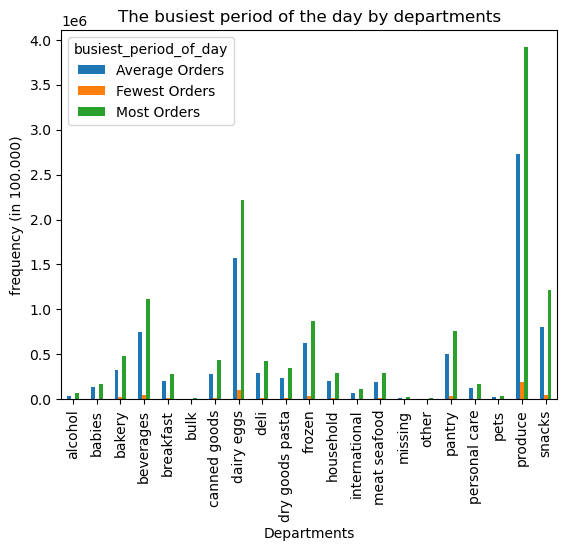

In [163]:
# plot stacked bar chart
cross_dept_bpday.plot(kind='bar')

# set chart title and axis labels
plt.title('The busiest period of the day by departments')
plt.xlabel('Departments')
plt.ylabel('frequency (in 100.000)')

#save image
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_dept_bpday.png'))

# show chart
plt.show()

In [121]:
#create crosstab from 'region' & 'spending_flag' columns
cross_reg_spend = pd.crosstab(df_customers['region'], df_customers['Spending_flag'], dropna = False)

In [122]:
cross_reg_spend

Spending_flag,High spender,Low spender
region,,
Midwest,114483,5280604
Northeast,77314,4012237
South,148627,7533744
West,112069,5797022


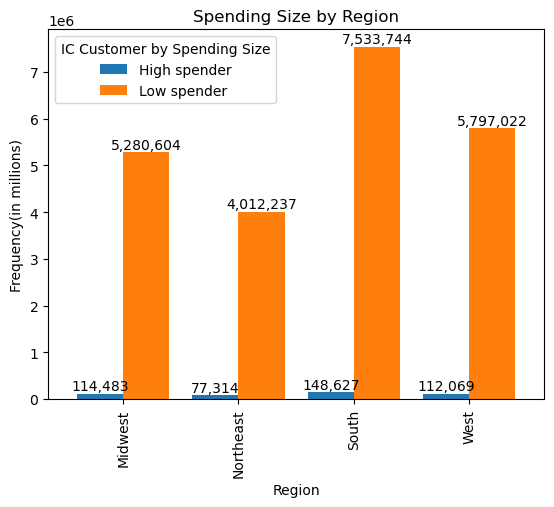

In [164]:
# plot clustered bar chart
ax = cross_reg_spend.plot(kind='bar', width=0.8)

# add data labels
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_y() + rect.get_height() + 10000
    label = f"{int(rect.get_height()):,}"
    ax.annotate(label, (x, y), ha='center', va='bottom')

# set chart title and axis labels
ax.set_title('Spending Size by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Frequency(in millions)')

# add legend
ax.legend(title='IC Customer by Spending Size')

#save image
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_reg_spend.png'))

# show chart
plt.show()

## 9. Exporting Final Data Set

In [124]:
#check colums of final dataset
df_customers.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_label',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'max_prices', 'max_price', 'Spending_flag',
       'average_price', 'regularity_of_users_ordering_behavior',
       'frequency_flag', 'region', 'exclusion_flag', 'age_group',
       'income_group', 'department', 'alcohol_behavior', 'pet_ownership',
       'household', 'orders_week', 'orders_day'],
      dtype='object')

In [125]:
#check size of final dataset
df_customers.shape

(23076100, 43)

In [126]:
#export dataset as 'final_IC_dataframe' 
df_customers.to_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'final_IC_dataframe.pkl'))